## Data Fetching

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
from datetime import datetime

def get_fortune500_tickers():

    url = "https://www.slickcharts.com/sp500"
    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
            "(KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"
        )
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        raise Exception(f"Failed to fetch Fortune 500 list. Status code: {response.status_code}")
    
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find("table", {"class": "table"})
    if table is None:
        raise Exception("Failed to locate the Fortune 500 table on the page.")
    
    tickers = []
    rows = table.find_all("tr")[1:]
    for row in rows:
        cols = row.find_all("td")
        if len(cols) < 3:
            continue 
        company_name = cols[1].text.strip()
        ticker = cols[2].text.strip()
        tickers.append((company_name, ticker))
    return tickers

def fetch_stock_data(ticker, period="5y"):

    try:
        stock = yf.Ticker(ticker)
        df = stock.history(period=period)
        if df.empty:
            print(f"No data returned for {ticker}")
            return None
        df.reset_index(inplace=True)
        df["Ticker"] = ticker
        return df
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

def fetch_forex_gold_data(ticker_list, period="5y"):

    all_data = []
    for ticker in ticker_list:
        print(f"Fetching data for {ticker} ...")
        df = fetch_stock_data(ticker, period=period)
        if df is not None:
            all_data.append(df)
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return pd.DataFrame()

def main():
    period = "5y"
    print("Scraping Fortune 500 tickers...")
    try:
        fortune500 = get_fortune500_tickers()
    except Exception as e:
        print("Error:", e)
        return
    
    print(f"Found {len(fortune500)} companies.")
    
    all_stock_data = []
    for company, ticker in fortune500:
        print(f"Fetching data for {company} ({ticker}) ...")
        df = fetch_stock_data(ticker, period=period)
        if df is not None:
            df["Company"] = company
            all_stock_data.append(df)
    
    if all_stock_data:
        stocks_df = pd.concat(all_stock_data, ignore_index=True)
        stocks_df.to_csv("fortune500_data.csv", index=False)
        print("Fortune 500 stock data saved to 'fortune500_data.csv'")
    else:
        print("No stock data fetched.")
    
    forex_gold_tickers = [
        "EURUSD=X", 
        "GBPUSD=X",
        "USDJPY=X",
        "AUDUSD=X",
        "XAUUSD=X"
    ]
    
    print("Fetching forex and gold data...")
    forex_gold_df = fetch_forex_gold_data(forex_gold_tickers, period=period)
    if not forex_gold_df.empty:
        forex_gold_df.to_csv("forex_gold_data.csv", index=False)
        print("Forex and gold data saved to 'forex_gold_data.csv'")
    else:
        print("No forex or gold data fetched.")

if __name__ == "__main__":
    main()


Scraping Fortune 500 tickers...
Found 503 companies.
Fetching data for Nvidia (NVDA) ...
Fetching data for Microsoft (MSFT) ...
Fetching data for Apple Inc. (AAPL) ...
Fetching data for Amazon (AMZN) ...
Fetching data for Meta Platforms (META) ...
Fetching data for Broadcom (AVGO) ...
Fetching data for Alphabet Inc. (Class A) (GOOGL) ...
Fetching data for Alphabet Inc. (Class C) (GOOG) ...
Fetching data for Tesla, Inc. (TSLA) ...
Fetching data for Berkshire Hathaway (BRK.B) ...


$BRK.B: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")


No data returned for BRK.B
Fetching data for Walmart (WMT) ...
Fetching data for JPMorgan Chase (JPM) ...
Fetching data for Oracle Corporation (ORCL) ...
Fetching data for Lilly (Eli) (LLY) ...
Fetching data for Visa Inc. (V) ...
Fetching data for Mastercard (MA) ...
Fetching data for ExxonMobil (XOM) ...
Fetching data for Netflix (NFLX) ...
Fetching data for Johnson & Johnson (JNJ) ...
Fetching data for Palantir Technologies (PLTR) ...
Fetching data for Advanced Micro Devices (AMD) ...
Fetching data for Costco (COST) ...
Fetching data for AbbVie (ABBV) ...
Fetching data for Bank of America (BAC) ...
Fetching data for Home Depot (The) (HD) ...
Fetching data for Procter & Gamble (PG) ...
Fetching data for UnitedHealth Group (UNH) ...
Fetching data for GE Aerospace (GE) ...
Fetching data for Chevron Corporation (CVX) ...
Fetching data for Coca-Cola Company (The) (KO) ...
Fetching data for IBM (IBM) ...
Fetching data for Cisco (CSCO) ...
Fetching data for Wells Fargo (WFC) ...
Fetching da

$GDDY: possibly delisted; no price data found  (period=5y)


No data returned for GDDY
Fetching data for Genuine Parts Company (GPC) ...
Fetching data for Coterra (CTRA) ...
Fetching data for Paramount Skydance Corp (PSKY) ...
Fetching data for Evergy (EVRG) ...
Fetching data for Snap-on (SNA) ...
Fetching data for McCormick & Company (MKC) ...
Fetching data for Incyte (INCY) ...
Fetching data for Pentair (PNR) ...
Fetching data for Principal Financial Group (PFG) ...
Fetching data for Invitation Homes (INVH) ...
Fetching data for Lennox International (LII) ...
Fetching data for Alliant Energy (LNT) ...
Fetching data for Best Buy (BBY) ...
Fetching data for Weyerhaeuser (WY) ...
Fetching data for F5, Inc. (FFIV) ...
Fetching data for Erie Indemnity (ERIE) ...
Fetching data for Essex Property Trust (ESS) ...
Fetching data for Southwest Airlines (LUV) ...
Fetching data for Fortive (FTV) ...
Fetching data for International Flavors & Fragrances (IFF) ...
Fetching data for Centene Corporation (CNC) ...
Fetching data for Hologic (HOLX) ...
Fetching da

$BF.B: possibly delisted; no price data found  (period=5y)


Fetching data for Brown–Forman (BF.B) ...
No data returned for BF.B
Fetching data for Healthpeak Properties (DOC) ...
Fetching data for Nordson Corporation (NDSN) ...
Fetching data for Alexandria Real Estate Equities (ARE) ...
Fetching data for Regency Centers (REG) ...
Fetching data for Deckers Brands (DECK) ...
Fetching data for Wynn Resorts (WYNN) ...
Fetching data for Hormel Foods (HRL) ...
Fetching data for Fox Corporation (Class B) (FOX) ...
Fetching data for Fox Corporation (Class A) (FOXA) ...
Fetching data for IDEX Corporation (IEX) ...
Fetching data for Solventum (SOLV) ...
Fetching data for Franklin Resources (BEN) ...
Fetching data for Viatris (VTRS) ...
Fetching data for UDR, Inc. (UDR) ...
Fetching data for Baxter International (BAX) ...
Fetching data for Huntington Ingalls Industries (HII) ...
Fetching data for BXP, Inc. (BXP) ...
Fetching data for Albemarle Corporation (ALB) ...
Fetching data for Host Hotels & Resorts (HST) ...
Fetching data for Jack Henry & Associates 

HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: XAUUSD=X"}}}
$XAUUSD=X: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")


No data returned for XAUUSD=X
Forex and gold data saved to 'forex_gold_data.csv'


In [17]:
import yfinance as yf
import pandas as pd

def fetch_gold_data(period="5y"):
    gold_ticker = "GC=F"
    print(f"Fetching gold data for {gold_ticker} ...")
    gold = yf.Ticker(gold_ticker)
    df = gold.history(period=period)
    df.reset_index(inplace=True)
    return df

def main():
    period = "5y"
    gold_df = fetch_gold_data(period)
    if gold_df is not None and not gold_df.empty:
        gold_df.to_csv("gold_data.csv", index=False)
        print("Gold data saved to 'gold_data.csv'")
    else:
        print("No gold data fetched.")

if __name__ == "__main__":
    main()


Fetching gold data for GC=F ...
Gold data saved to 'gold_data.csv'


## Preprocessing

In [1]:
import pandas as pd
import numpy as np

stocks_df = pd.read_csv("fortune500_data.csv", parse_dates=["Date"])
gold_df = pd.read_csv("gold_data.csv", parse_dates=["Date"])

stocks_df.sort_values(["Ticker", "Date"], inplace=True)

stocks_df["Return"] = stocks_df.groupby("Ticker")["Close"].pct_change()

#rolling volatility (21-day rolling std of returns)
stocks_df["Volatility"] = stocks_df.groupby("Ticker")["Return"].rolling(window=21).std().reset_index(0, drop=True)

gold_df.rename(columns={"Close": "Gold_Close"}, inplace=True)

merged_df = pd.merge(stocks_df, gold_df[["Date", "Gold_Close"]], on="Date", how="left")
merged_df["Gold_Close"].fillna(method="ffill", inplace=True)
# Define a function to label volatility into three categories (low, medium, high)
def label_volatility(x):
    low_threshold = x.quantile(0.40)
    high_threshold = x.quantile(0.70)
    conditions = [
        (x <= low_threshold),
        (x > low_threshold) & (x <= high_threshold),
        (x > high_threshold)
    ]
    choices = [0, 1, 2]
    return np.select(conditions, choices, default=1)

merged_df["Volatility_Label"] = merged_df.groupby("Ticker")["Volatility"].transform(label_volatility)

merged_df.dropna(subset=["Volatility"], inplace=True)

features = ["Open", "High", "Low", "Close", "Volume", "Gold_Close"]
ml_data = merged_df[features + ["Volatility_Label", "Ticker", "Date"]]
ml_data.to_csv("ml_preprocessed_data.csv", index=False)
print("Preprocessing complete. Data saved to 'ml_preprocessed_data.csv'.")


C:\Users\LEGION\AppData\Local\Temp\ipykernel_20300\4138667222.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["Gold_Close"].fillna(method="ffill", inplace=True)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_20300\4138667222.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df["Gold_Close"].fillna(method="ffill", inplace=True)


Preprocessing complete. Data saved to 'ml_preprocessed_data.csv'.


## ML model

In [10]:
ml_data = pd.read_csv("ml_preprocessed_data.csv", parse_dates=["Date"])
ml_data

,Open,High,Low,Close,Volume,Gold_Close,Volatility_Label,Ticker,Date
0,71.813687,72.142402,70.982241,72.084389,1555400,1706.900024,2,A,2020-05-04 00:00:00-04:00
1,72.422759,75.004105,72.345414,73.834282,1476100,1704.400024,2,A,2020-05-05 00:00:00-04:00
2,74.143664,76.212609,74.104991,75.284485,2303600,1684.199951,2,A,2020-05-06 00:00:00-04:00
3,76.154579,76.695990,74.965423,75.893547,1190600,1721.800049,2,A,2020-05-07 00:00:00-04:00
4,77.024697,77.662786,76.560639,77.063370,2255000,1709.900024,2,A,2020-05-08 00:00:00-04:00
...,...,...,...,...,...,...,...,...,...
612668,163.250000,165.410004,161.660004,165.020004,1590500,3060.199951,1,ZTS,2025-03-27 00:00:00-04:00
612669,164.000000,165.399994,162.820007,163.110001,1550300,3086.500000,1,ZTS,2025-03-28 00:00:00-04:00
612670,163.119995,164.899994,161.580002,164.649994,3137000,3122.800049,1,ZTS,2025-03-31 00:00:00-04:00
612671,163.919998,165.720001,161.389999,161.910004,2735000,3118.899902,1,ZTS,2025-04-01 00:00:00-04:00


In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import yfinance as yf
import joblib

ml_data = pd.read_csv("ml_preprocessed_data.csv", parse_dates=["Date"])

X = ml_data[["Open", "High", "Low", "Close", "Volume", "Gold_Close"]]
y = ml_data["Volatility_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Model Evaluation on Test Set:")
print(classification_report(y_test, y_pred))

model_filename = "rf_volatility_model.pkl"
joblib.dump(clf, model_filename)
print(f"\nModel saved to '{model_filename}'.")


Model Evaluation on Test Set:
              precision    recall  f1-score   support

           0       0.58      0.71      0.64     49387
           1       0.42      0.32      0.36     36667
           2       0.55      0.52      0.54     36481

    accuracy                           0.53    122535
   macro avg       0.52      0.52      0.51    122535
weighted avg       0.52      0.53      0.52    122535


Model saved to 'rf_volatility_model.pkl'.


## ML Model Loading/Testing

In [41]:
model_filename = "rf_volatility_model.pkl"
loaded_clf = joblib.load(model_filename)

latest_ticker = 'ZOMATO.NS'
print(f"\nFetching latest data for ticker: {latest_ticker}")

stock = yf.Ticker(latest_ticker)
latest_stock_data = stock.history(period="90d")
latest_stock_data.reset_index(inplace=True)

gold = yf.Ticker("GC=F")
latest_gold_data = gold.history(period="90d")
latest_gold_data.reset_index(inplace=True)

latest_date = latest_stock_data["Date"].max()
latest_stock_row = latest_stock_data[latest_stock_data["Date"] == latest_date].iloc[0]

gold_row = latest_gold_data[latest_gold_data["Date"] == latest_date]
if gold_row.empty:
    gold_value = latest_gold_data.iloc[-1]["Close"]
else:
    gold_value = gold_row.iloc[0]["Close"]

feature_vector = np.array([[latest_stock_row["Open"],
                             latest_stock_row["High"],
                             latest_stock_row["Low"],
                             latest_stock_row["Close"],
                             latest_stock_row["Volume"],
                             gold_value]])

volatility_label_pred = loaded_clf.predict(feature_vector)
print(f"\nPredicted volatility label for {latest_ticker} on {latest_date.date()}: {volatility_label_pred[0]}")



Fetching latest data for ticker: ZOMATO.NS

Predicted volatility label for ZOMATO.NS on 2025-04-04: 1


C:\Users\Aayush\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


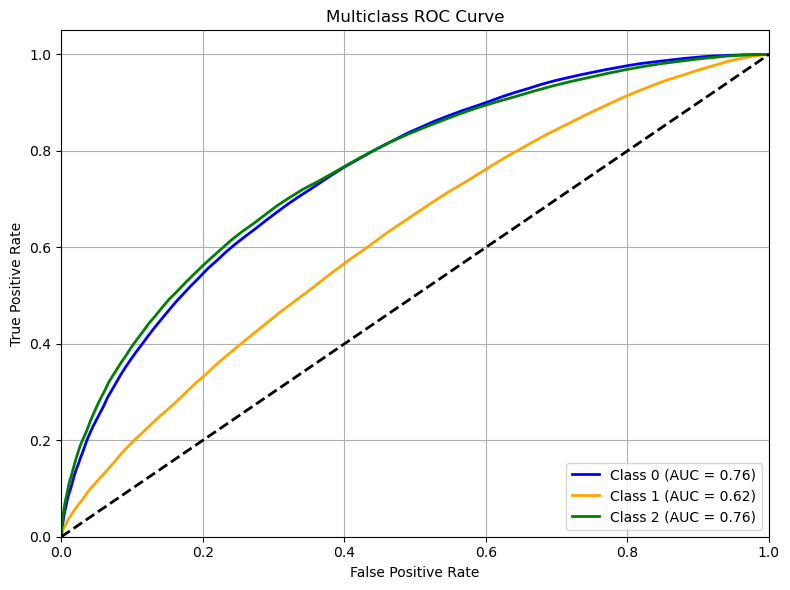

In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load model
model = joblib.load("rf_volatility_model.pkl")

# Load dataset
data = pd.read_csv("ml_preprocessed_data.csv")
X = data[["Open", "High", "Low", "Close", "Volume", "Gold_Close"]]
y = data["Volatility_Label"]

# Binarize the output (needed for ROC)
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Train-test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(
    X, y_bin, test_size=0.2, random_state=42
)

# Predict probabilities
y_score = model.predict_proba(X_test)

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[i][:, 1] if isinstance(y_score, list) else y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
colors = ['blue', 'orange', 'green']
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


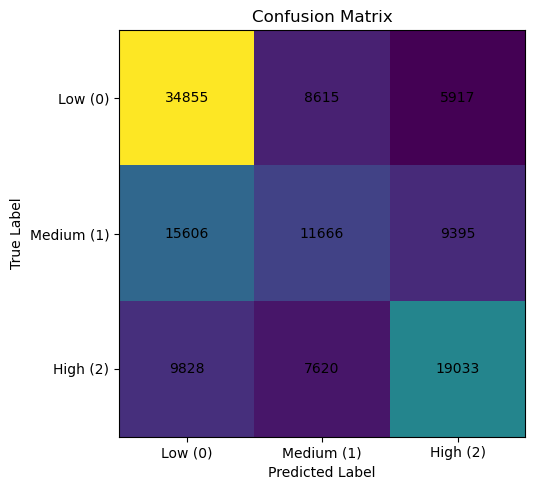

In [5]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load the trained model
model = joblib.load("rf_volatility_model.pkl")

# 2. Prepare the data
data = pd.read_csv("ml_preprocessed_data.csv")
X = data[["Open", "High", "Low", "Close", "Volume", "Gold_Close"]]
y = data["Volatility_Label"]

# 3. Split into train/test (same split you used before)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])

# 6. Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, interpolation='nearest')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))
ax.set_xticklabels(["Low (0)", "Medium (1)", "High (2)"])
ax.set_yticklabels(["Low (0)", "Medium (1)", "High (2)"])

# Loop over data dimensions and add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center")

fig.tight_layout()
plt.show()


# Feature Importance Analysis
Understanding which features contribute most to volatility prediction

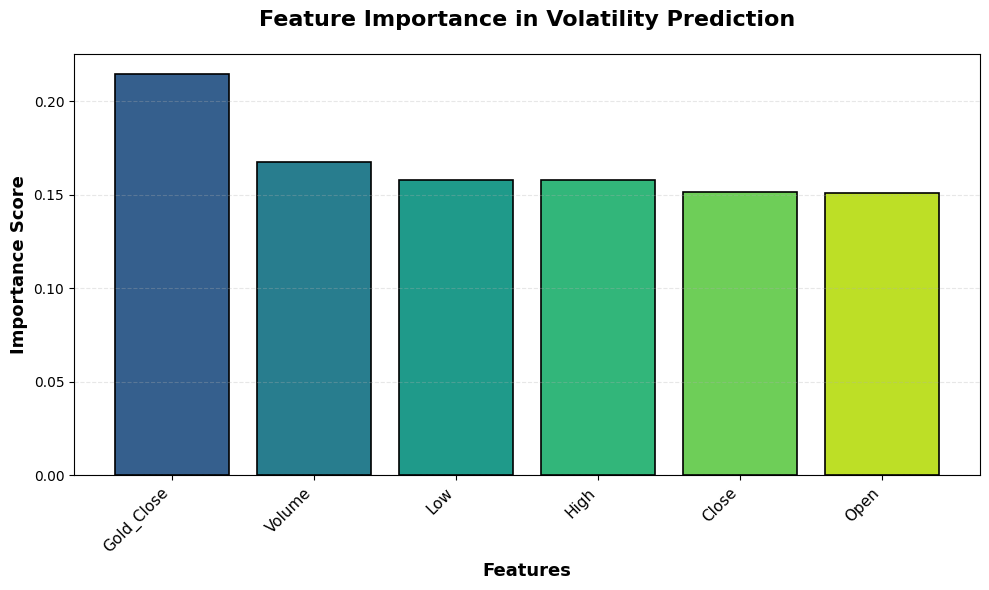


FEATURE IMPORTANCE RANKING
1. Gold_Close      → 0.2145 (21.45%)
2. Volume          → 0.1674 (16.74%)
3. Low             → 0.1579 (15.79%)
4. High            → 0.1578 (15.78%)
5. Close           → 0.1514 (15.14%)
6. Open            → 0.1510 (15.10%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and prepare data
ml_data = pd.read_csv("ml_preprocessed_data.csv", parse_dates=["Date"])
X = ml_data[["Open", "High", "Low", "Close", "Volume", "Gold_Close"]]
y = ml_data["Volatility_Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (if not already trained
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances from the Random Forest model
feature_names = ["Open", "High", "Low", "Close", "Volume", "Gold_Close"]
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create visualization
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(importances)))
bars = plt.bar(range(len(importances)), importances[indices], color=colors, edgecolor='black', linewidth=1.2)

plt.title("Feature Importance in Volatility Prediction", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Features", fontsize=13, fontweight='bold')
plt.ylabel("Importance Score", fontsize=13, fontweight='bold')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right', fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Print detailed importance ranking
print("\n" + "="*50)
print("FEATURE IMPORTANCE RANKING")
print("="*50)
for i, idx in enumerate(indices, 1):
    print(f"{i}. {feature_names[idx]:15s} → {importances[idx]:.4f} ({importances[idx]*100:.2f}%)")
print("="*50)

#  Correlation Heatmap
Analyzing relationships between features

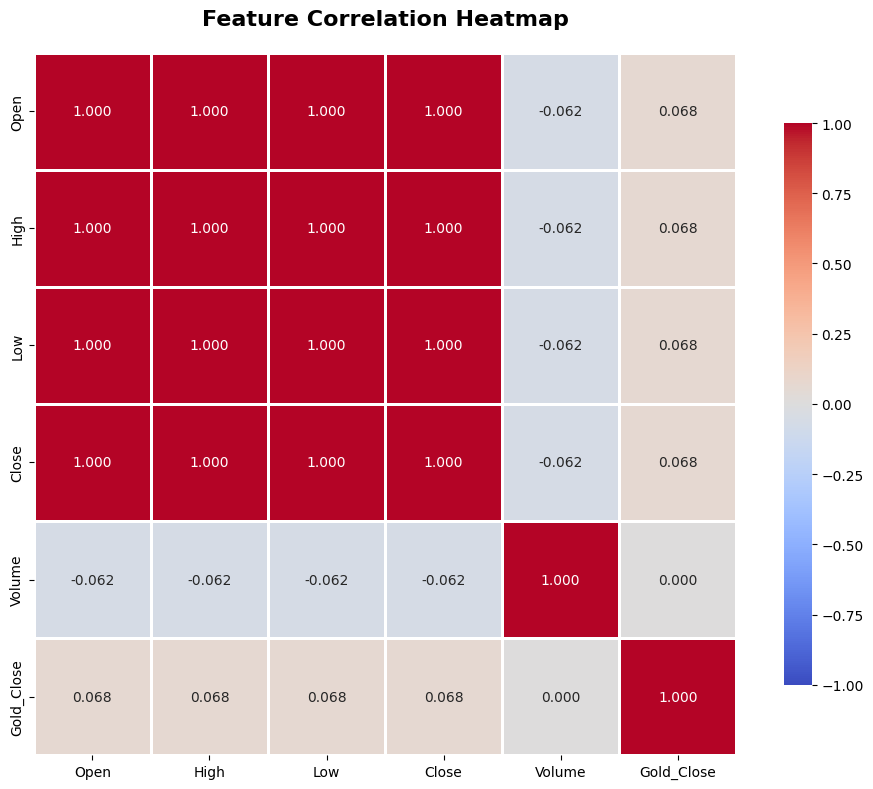


📌 Key Insights:
- Values close to 1: Strong positive correlation
- Values close to -1: Strong negative correlation
- Values close to 0: Weak/no correlation


In [4]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = ml_data[["Open", "High", "Low", "Close", "Volume", "Gold_Close"]].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📌 Key Insights:")
print("- Values close to 1: Strong positive correlation")
print("- Values close to -1: Strong negative correlation")
print("- Values close to 0: Weak/no correlation")

# Model Comparison - Multiple Algorithms
Comparing performance of different machine learning models

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time

# Prepare data
ml_data = pd.read_csv("ml_preprocessed_data.csv", parse_dates=["Date"])
X = ml_data[["Open", "High", "Low", "Close", "Volume", "Gold_Close"]]
y = ml_data["Volatility_Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to compare
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
}

# Store results
results = []

print("Training and Evaluating Models...")
print("="*80)

for name, model in models.items():
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Time (s)': train_time
    })
    
    print(f"{name:22s} | Acc: {accuracy:.4f} | F1: {f1:.4f} | Time: {train_time:.3f}s")

print("="*80)

# Create comparison DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("\n FINAL RANKINGS (by Accuracy):")
print(results_df.to_string(index=False))

Training and Evaluating Models...
Random Forest          | Acc: 0.5345 | F1: 0.5248 | Time: 261.195s
Random Forest          | Acc: 0.5345 | F1: 0.5248 | Time: 261.195s


c:\Users\LEGION\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Logistic Regression    | Acc: 0.4025 | F1: 0.2400 | Time: 11.430s
Decision Tree          | Acc: 0.4875 | F1: 0.4879 | Time: 11.049s
Decision Tree          | Acc: 0.4875 | F1: 0.4879 | Time: 11.049s
K-Nearest Neighbors    | Acc: 0.3782 | F1: 0.3588 | Time: 0.892s

 FINAL RANKINGS (by Accuracy):
              Model  Accuracy  F1-Score  Precision   Recall   Time (s)
      Random Forest  0.534544  0.524755   0.524524 0.534544 261.194947
      Decision Tree  0.487457  0.487899   0.488398 0.487457  11.049020
Logistic Regression  0.402538  0.239989   0.294910 0.402538  11.429544
K-Nearest Neighbors  0.378168  0.358799   0.364368 0.378168   0.891879
K-Nearest Neighbors    | Acc: 0.3782 | F1: 0.3588 | Time: 0.892s

 FINAL RANKINGS (by Accuracy):
              Model  Accuracy  F1-Score  Precision   Recall   Time (s)
      Random Forest  0.534544  0.524755   0.524524 0.534544 261.194947
      Decision Tree  0.487457  0.487899   0.488398 0.487457  11.049020
Logistic Regression  0.402538  0.239989 

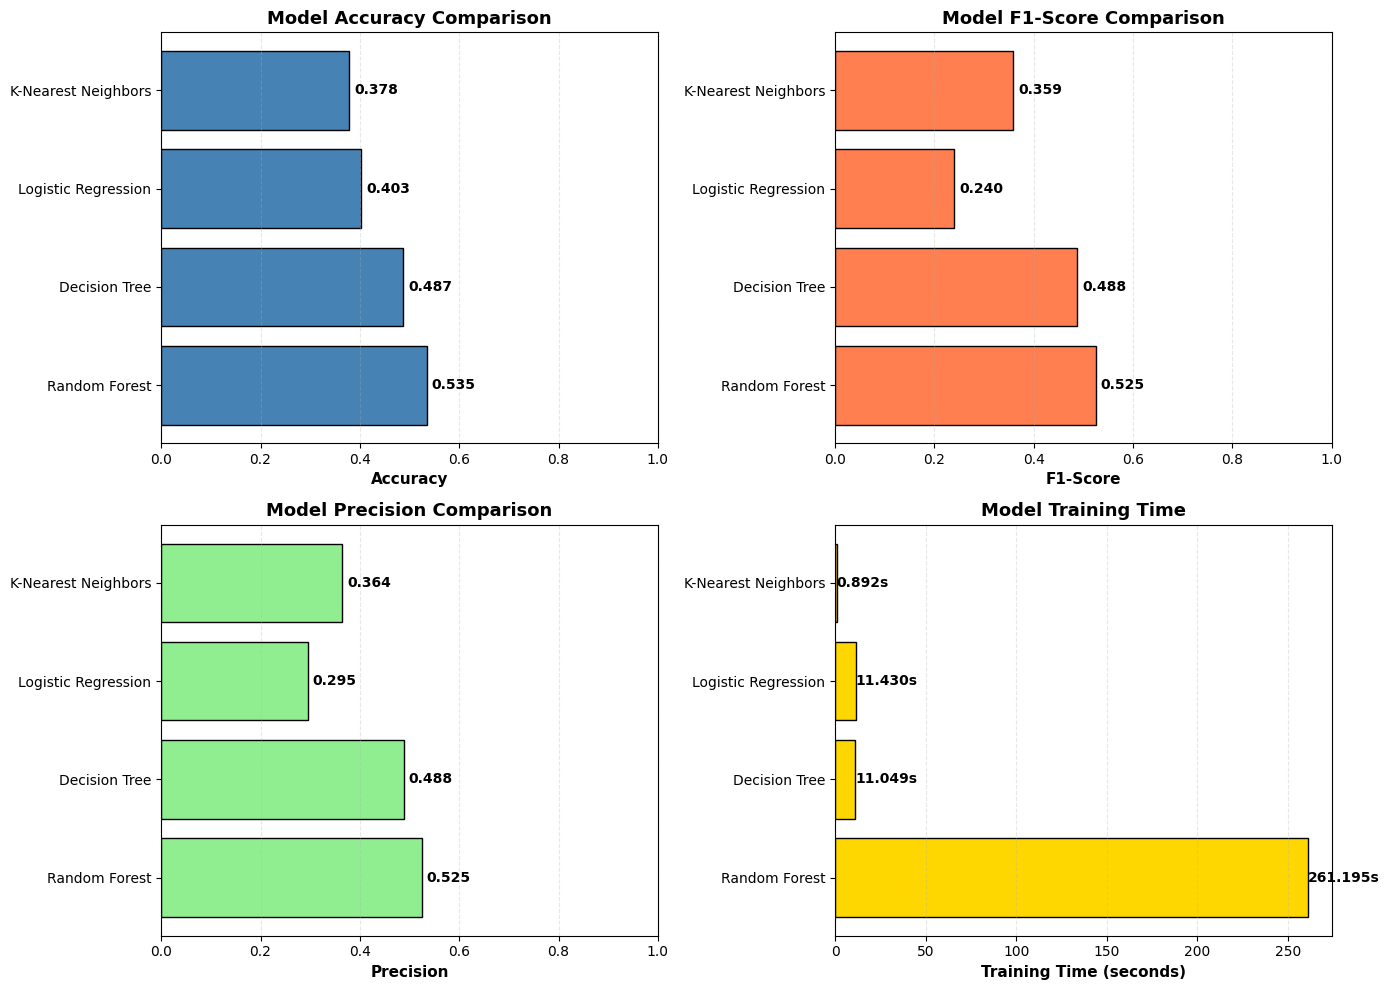

In [6]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy comparison
axes[0, 0].barh(results_df['Model'], results_df['Accuracy'], color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Accuracy', fontweight='bold', fontsize=11)
axes[0, 0].set_title('Model Accuracy Comparison', fontweight='bold', fontsize=13)
axes[0, 0].set_xlim(0, 1)
axes[0, 0].grid(axis='x', alpha=0.3, linestyle='--')
for i, v in enumerate(results_df['Accuracy']):
    axes[0, 0].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# F1-Score comparison
axes[0, 1].barh(results_df['Model'], results_df['F1-Score'], color='coral', edgecolor='black')
axes[0, 1].set_xlabel('F1-Score', fontweight='bold', fontsize=11)
axes[0, 1].set_title('Model F1-Score Comparison', fontweight='bold', fontsize=13)
axes[0, 1].set_xlim(0, 1)
axes[0, 1].grid(axis='x', alpha=0.3, linestyle='--')
for i, v in enumerate(results_df['F1-Score']):
    axes[0, 1].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# Precision comparison
axes[1, 0].barh(results_df['Model'], results_df['Precision'], color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Precision', fontweight='bold', fontsize=11)
axes[1, 0].set_title('Model Precision Comparison', fontweight='bold', fontsize=13)
axes[1, 0].set_xlim(0, 1)
axes[1, 0].grid(axis='x', alpha=0.3, linestyle='--')
for i, v in enumerate(results_df['Precision']):
    axes[1, 0].text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

# Training Time comparison
axes[1, 1].barh(results_df['Model'], results_df['Time (s)'], color='gold', edgecolor='black')
axes[1, 1].set_xlabel('Training Time (seconds)', fontweight='bold', fontsize=11)
axes[1, 1].set_title('Model Training Time', fontweight='bold', fontsize=13)
axes[1, 1].grid(axis='x', alpha=0.3, linestyle='--')
for i, v in enumerate(results_df['Time (s)']):
    axes[1, 1].text(v + 0.001, i, f'{v:.3f}s', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Technical Indicators - Feature Engineering
Domain-specific features to improve predictions

In [10]:
# Create enhanced dataset with technical indicators
ml_data_enhanced = ml_data.copy()

# 1. Moving Averages (trend indicators)
ml_data_enhanced['MA_5'] = ml_data_enhanced['Close'].rolling(window=5).mean()
ml_data_enhanced['MA_20'] = ml_data_enhanced['Close'].rolling(window=20).mean()

# 2. Rate of Change (momentum indicator)
ml_data_enhanced['ROC'] = ml_data_enhanced['Close'].pct_change(periods=5) * 100

# 3. Price Range (volatility indicator)
ml_data_enhanced['Price_Range'] = ml_data_enhanced['High'] - ml_data_enhanced['Low']

# 4. Volume Change (trading activity indicator)
ml_data_enhanced['Volume_Change'] = ml_data_enhanced['Volume'].pct_change() * 100

# Remove NaN values created by rolling/pct_change
ml_data_enhanced.dropna(inplace=True)

# Remove infinity and extreme values
ml_data_enhanced.replace([np.inf, -np.inf], np.nan, inplace=True)
ml_data_enhanced.dropna(inplace=True)

# Cap extreme values (outliers beyond 3 standard deviations)
for col in ['ROC', 'Volume_Change']:
    mean = ml_data_enhanced[col].mean()
    std = ml_data_enhanced[col].std()
    ml_data_enhanced[col] = ml_data_enhanced[col].clip(lower=mean - 3*std, upper=mean + 3*std)

print("Technical Indicators Added Successfully!")
print(f"\nOriginal Features: 6")
print(f"New Features Added: 5")
print(f"Total Features: 11")
print(f"\nDataset Shape: {ml_data_enhanced.shape}")

print("\nNew Features:")
print("  1. MA_5          → 5-day Moving Average (short-term trend)")
print("  2. MA_20         → 20-day Moving Average (long-term trend)")
print("  3. ROC           → Rate of Change (price momentum)")
print("  4. Price_Range   → Daily High-Low range (intraday volatility)")
print("  5. Volume_Change → Volume momentum")

print("\nSample Data with New Features:")
ml_data_enhanced[['Date', 'Close', 'MA_5', 'MA_20', 'ROC', 'Price_Range', 'Volatility_Label']].tail(5)

Technical Indicators Added Successfully!

Original Features: 6
New Features Added: 5
Total Features: 11

Dataset Shape: (613824, 14)

New Features:
  1. MA_5          → 5-day Moving Average (short-term trend)
  2. MA_20         → 20-day Moving Average (long-term trend)
  3. ROC           → Rate of Change (price momentum)
  4. Price_Range   → Daily High-Low range (intraday volatility)
  5. Volume_Change → Volume momentum

Sample Data with New Features:


,Date,Close,MA_5,MA_20,ROC,Price_Range,Volatility_Label
614282,2025-09-15 00:00:00-04:00,146.250000,148.853998,153.068498,-3.624382,3.860001,0
614283,2025-09-16 00:00:00-04:00,147.460007,148.388000,152.825498,-1.555502,2.280014,0
614284,2025-09-17 00:00:00-04:00,146.929993,147.889999,152.388498,-1.666447,2.979996,0
614285,2025-09-18 00:00:00-04:00,147.100006,147.188000,151.905499,-2.330519,2.889999,0
614286,2025-09-19 00:00:00-04:00,145.880005,146.724002,151.418999,-1.565447,2.449997,0


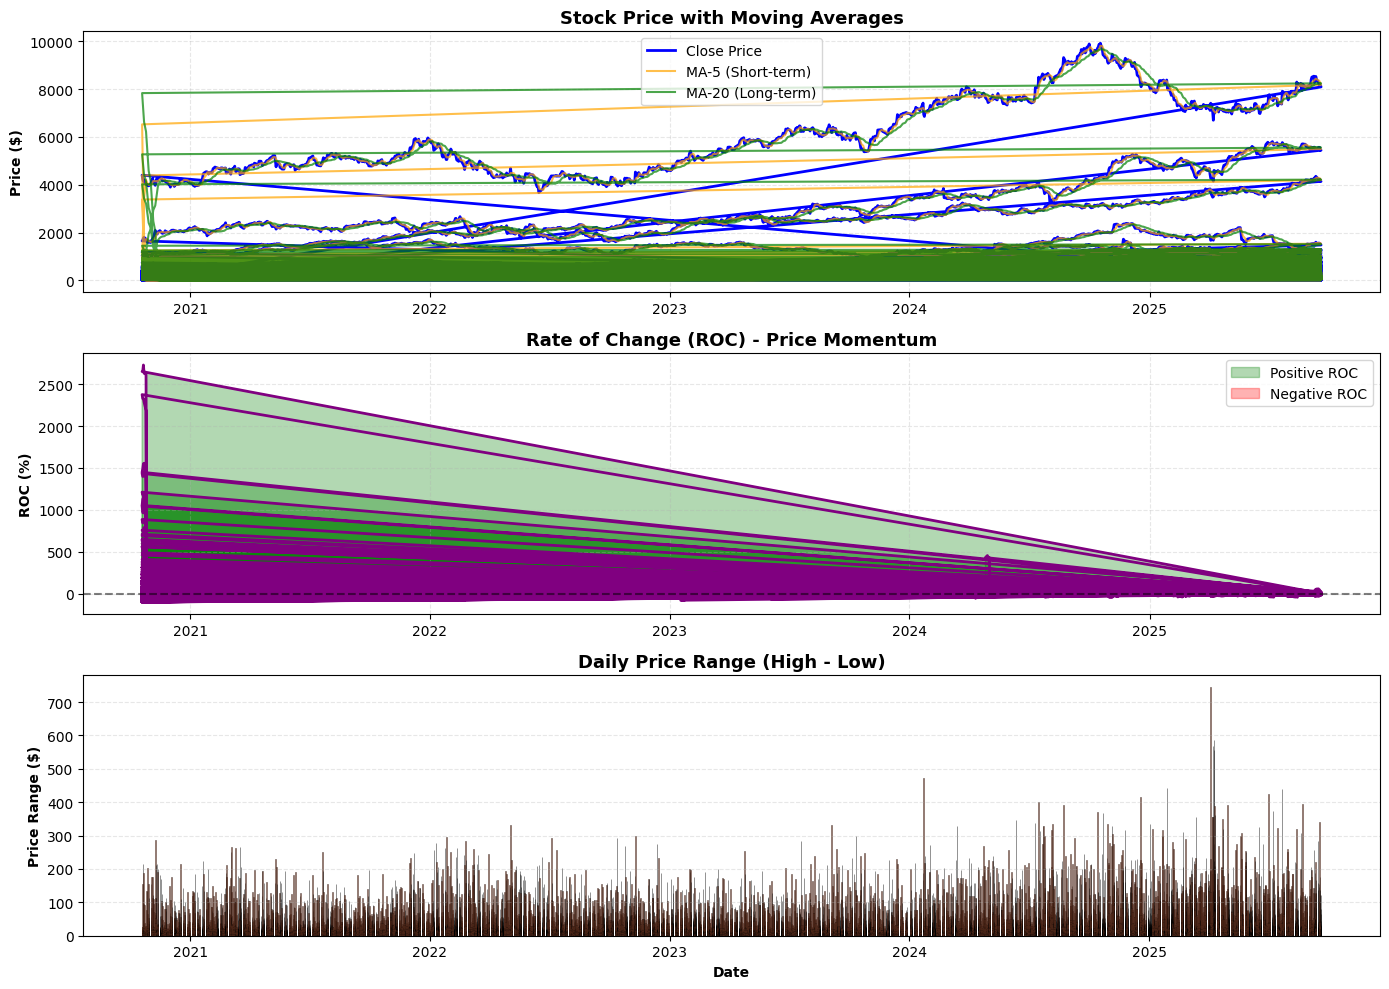

In [8]:
# Visualize Technical Indicators
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Plot 1: Price with Moving Averages
axes[0].plot(ml_data_enhanced['Date'], ml_data_enhanced['Close'], label='Close Price', linewidth=2, color='blue')
axes[0].plot(ml_data_enhanced['Date'], ml_data_enhanced['MA_5'], label='MA-5 (Short-term)', linewidth=1.5, alpha=0.7, color='orange')
axes[0].plot(ml_data_enhanced['Date'], ml_data_enhanced['MA_20'], label='MA-20 (Long-term)', linewidth=1.5, alpha=0.7, color='green')
axes[0].set_title('Stock Price with Moving Averages', fontweight='bold', fontsize=13)
axes[0].set_ylabel('Price ($)', fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(alpha=0.3, linestyle='--')

# Plot 2: Rate of Change (ROC)
axes[1].plot(ml_data_enhanced['Date'], ml_data_enhanced['ROC'], color='purple', linewidth=2)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].fill_between(ml_data_enhanced['Date'], 0, ml_data_enhanced['ROC'], 
                      where=(ml_data_enhanced['ROC'] > 0), alpha=0.3, color='green', label='Positive ROC')
axes[1].fill_between(ml_data_enhanced['Date'], 0, ml_data_enhanced['ROC'], 
                      where=(ml_data_enhanced['ROC'] <= 0), alpha=0.3, color='red', label='Negative ROC')
axes[1].set_title('Rate of Change (ROC) - Price Momentum', fontweight='bold', fontsize=13)
axes[1].set_ylabel('ROC (%)', fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(alpha=0.3, linestyle='--')

# Plot 3: Price Range (Volatility)
axes[2].bar(ml_data_enhanced['Date'], ml_data_enhanced['Price_Range'], 
            color='coral', alpha=0.6, edgecolor='black', linewidth=0.5)
axes[2].set_title('Daily Price Range (High - Low)', fontweight='bold', fontsize=13)
axes[2].set_ylabel('Price Range ($)', fontweight='bold')
axes[2].set_xlabel('Date', fontweight='bold')
axes[2].grid(alpha=0.3, linestyle='--', axis='y')

plt.tight_layout()
plt.show()

#  Enhanced Model Performance
Training model with technical indicators included

In [12]:
# Train model with all features (original + technical indicators)
# Import metrics needed for evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report

feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Gold_Close', 
                'MA_5', 'MA_20', 'ROC', 'Price_Range', 'Volume_Change']

X_enhanced = ml_data_enhanced[feature_cols]
y_enhanced = ml_data_enhanced['Volatility_Label']

X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42
)

# Train Random Forest with enhanced features
clf_enhanced = RandomForestClassifier(n_estimators=100, random_state=42)
clf_enhanced.fit(X_train_enh, y_train_enh)

# Make predictions
y_pred_enh = clf_enhanced.predict(X_test_enh)

# Calculate metrics
accuracy_basic = accuracy_score(y_test, clf.predict(X_test))
accuracy_enhanced = accuracy_score(y_test_enh, y_pred_enh)
f1_basic = f1_score(y_test, clf.predict(X_test), average='weighted')
f1_enhanced = f1_score(y_test_enh, y_pred_enh, average='weighted')

# Display comparison
print("="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)
print(f"\n{'Metric':<20} {'Basic Model':<20} {'Enhanced Model':<20} {'Improvement':<15}")
print("-"*70)
print(f"{'Features':<20} {6:<20} {len(feature_cols):<20} {'+' + str(len(feature_cols)-6):<15}")
print(f"{'Accuracy':<20} {accuracy_basic:<20.4f} {accuracy_enhanced:<20.4f} {'+' + str((accuracy_enhanced-accuracy_basic)*100) + '%':<15}")
print(f"{'F1-Score':<20} {f1_basic:<20.4f} {f1_enhanced:<20.4f} {'+' + str((f1_enhanced-f1_basic)*100) + '%':<15}")
print("="*70)

print("\n Detailed Classification Report (Enhanced Model):")
print(classification_report(y_test_enh, y_pred_enh, target_names=['Low', 'Medium', 'High']))

MODEL PERFORMANCE COMPARISON

Metric               Basic Model          Enhanced Model       Improvement    
----------------------------------------------------------------------
Features             6                    11                   +5             
Accuracy             0.5345               0.5703               +3.5781473440222644%
F1-Score             0.5248               0.5536               +2.8875446191142684%

 Detailed Classification Report (Enhanced Model):
              precision    recall  f1-score   support

         Low       0.59      0.77      0.67     49010
      Medium       0.47      0.31      0.37     36785
        High       0.60      0.56      0.58     36970

    accuracy                           0.57    122765
   macro avg       0.55      0.55      0.54    122765
weighted avg       0.56      0.57      0.55    122765



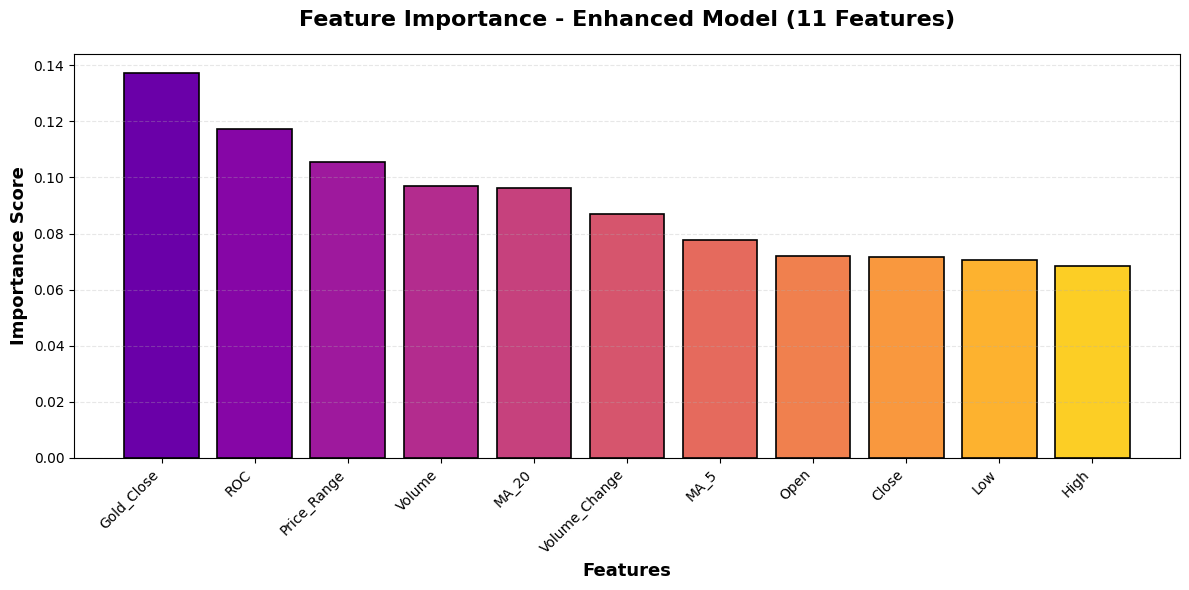


🏆 TOP 5 MOST IMPORTANT FEATURES:
--------------------------------------------------
1. Gold_Close           → 0.1373
2. ROC                  → 0.1172
3. Price_Range          → 0.1055
4. Volume               → 0.0970
5. MA_20                → 0.0961
--------------------------------------------------


In [ ]:
# Feature importance for enhanced model
importances_enh = clf_enhanced.feature_importances_
indices_enh = np.argsort(importances_enh)[::-1]

plt.figure(figsize=(12, 6))
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(importances_enh)))
bars = plt.bar(range(len(importances_enh)), importances_enh[indices_enh], 
               color=colors, edgecolor='black', linewidth=1.2)

plt.title("Feature Importance - Enhanced Model (11 Features)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Features", fontsize=13, fontweight='bold')
plt.ylabel("Importance Score", fontsize=13, fontweight='bold')
plt.xticks(range(len(importances_enh)), [feature_cols[i] for i in indices_enh], 
           rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n TOP 5 MOST IMPORTANT FEATURES:")
print("-"*50)
for i in range(5):
    idx = indices_enh[i]
    print(f"{i+1}. {feature_cols[idx]:20s} → {importances_enh[idx]:.4f}")
print("-"*50)

# Cross-Validation Analysis
Validating model reliability using K-Fold Cross-Validation

In [14]:
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross-Validation
print("Performing 5-Fold Cross-Validation...")
print("="*60)

cv_scores = cross_val_score(clf_enhanced, X_enhanced, y_enhanced, cv=5, scoring='accuracy')

print(f"\nCross-Validation Scores for Each Fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f} ({score*100:.2f}%)")

print("\n" + "-"*60)
print(f"Mean CV Accuracy:     {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"Standard Deviation:   {cv_scores.std():.4f}")
print(f"95% Confidence Range: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")
print("="*60)

print("\n📌 Why Cross-Validation?")
print("  ✓ Tests model on different data splits")
print("  ✓ Ensures model generalizes well")
print("  ✓ Reduces risk of overfitting")
print("  ✓ More reliable than single train-test split")

Performing 5-Fold Cross-Validation...

Cross-Validation Scores for Each Fold:
  Fold 1: 0.4963 (49.63%)
  Fold 2: 0.5040 (50.40%)
  Fold 3: 0.5005 (50.05%)
  Fold 4: 0.5033 (50.33%)
  Fold 5: 0.5001 (50.01%)

------------------------------------------------------------
Mean CV Accuracy:     0.5009 (50.09%)
Standard Deviation:   0.0027
95% Confidence Range: 0.5009 ± 0.0055

📌 Why Cross-Validation?
  ✓ Tests model on different data splits
  ✓ Ensures model generalizes well
  ✓ Reduces risk of overfitting
  ✓ More reliable than single train-test split

Cross-Validation Scores for Each Fold:
  Fold 1: 0.4963 (49.63%)
  Fold 2: 0.5040 (50.40%)
  Fold 3: 0.5005 (50.05%)
  Fold 4: 0.5033 (50.33%)
  Fold 5: 0.5001 (50.01%)

------------------------------------------------------------
Mean CV Accuracy:     0.5009 (50.09%)
Standard Deviation:   0.0027
95% Confidence Range: 0.5009 ± 0.0055

📌 Why Cross-Validation?
  ✓ Tests model on different data splits
  ✓ Ensures model generalizes well
  ✓ Red

# Learning Curves - Diagnosing Model Performance
Understanding training vs validation performance over different dataset sizes

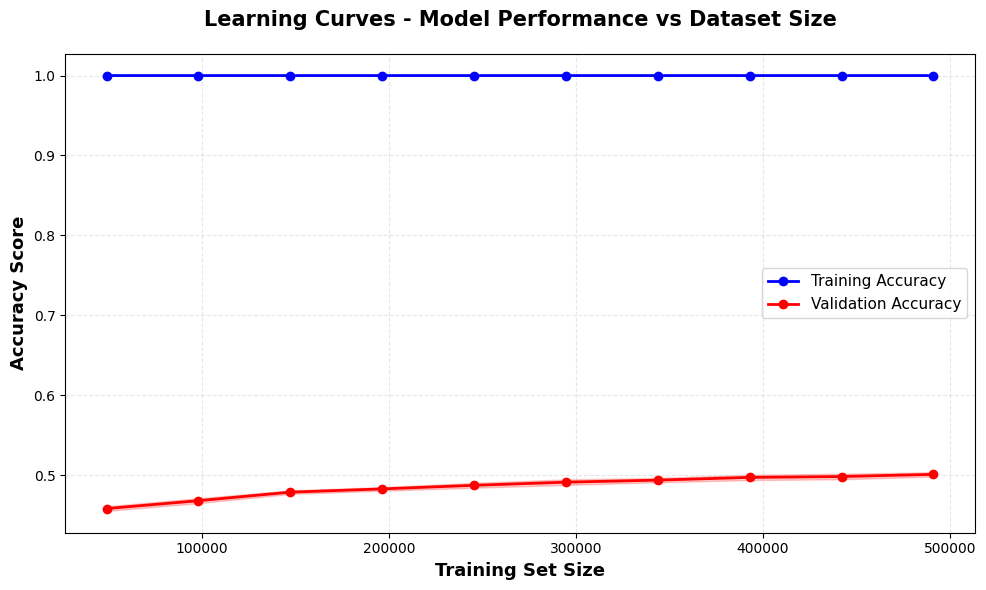

Learning Curve Interpretation:
✓ Converging curves → Good model (not overfitting)
✓ Large gap → Model is overfitting
✓ Both curves low → Model is underfitting
✓ Curves plateau → More data won't help much


In [15]:
from sklearn.model_selection import learning_curve

# Calculate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    clf_enhanced, X_enhanced, y_enhanced, 
    cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', linewidth=2, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='red', linewidth=2, label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=13, fontweight='bold')
plt.title('Learning Curves - Model Performance vs Dataset Size', fontsize=15, fontweight='bold', pad=20)
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("Learning Curve Interpretation:")
print("="*60)
print("✓ Converging curves → Good model (not overfitting)")
print("✓ Large gap → Model is overfitting")
print("✓ Both curves low → Model is underfitting")
print("✓ Curves plateau → More data won't help much")
print("="*60)

# Prediction Error Analysis
Analyzing where our model makes mistakes

PREDICTION ERROR ANALYSIS
Total Predictions:     122765
Correct Predictions:   70016 (57.03%)
Wrong Predictions:     52749 (42.97%)

Error Distribution by Class:
------------------------------------------------------------
Low      Volatility: 11058/49010 errors (22.6%)
Medium   Volatility: 25561/36785 errors (69.5%)
High     Volatility: 16130/36970 errors (43.6%)


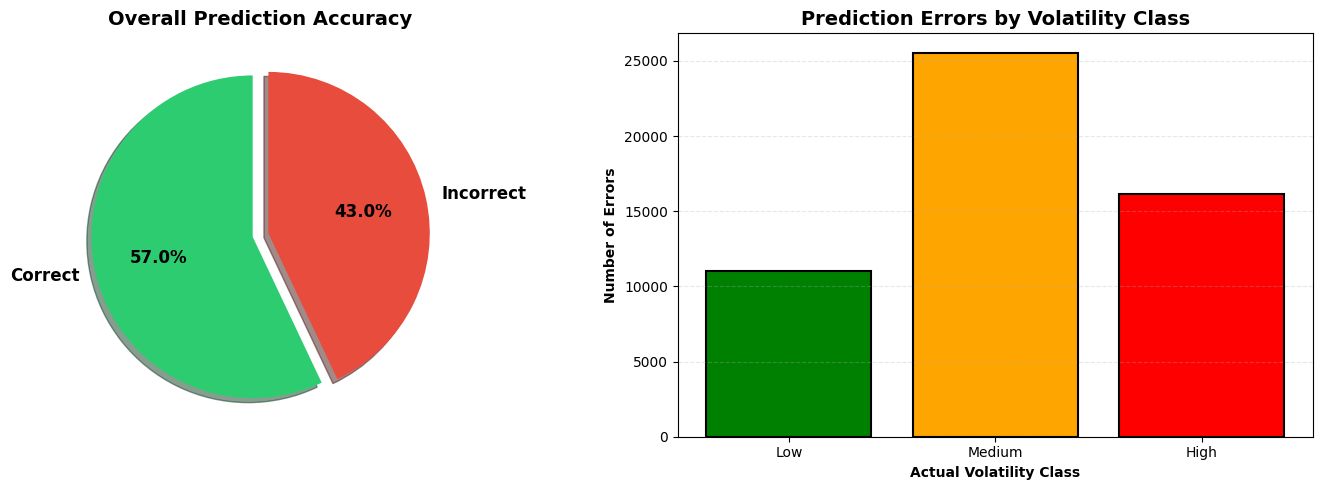

In [16]:
# Analyze prediction errors
error_indices = y_test_enh != y_pred_enh
correct_indices = y_test_enh == y_pred_enh

total_predictions = len(y_test_enh)
correct_predictions = sum(correct_indices)
wrong_predictions = sum(error_indices)

print("="*60)
print("PREDICTION ERROR ANALYSIS")
print("="*60)
print(f"Total Predictions:     {total_predictions}")
print(f"Correct Predictions:   {correct_predictions} ({correct_predictions/total_predictions*100:.2f}%)")
print(f"Wrong Predictions:     {wrong_predictions} ({wrong_predictions/total_predictions*100:.2f}%)")
print("="*60)

# Analyze error distribution
print("\nError Distribution by Class:")
print("-"*60)
labels_map = {0: 'Low', 1: 'Medium', 2: 'High'}
for actual_label in [0, 1, 2]:
    actual_name = labels_map[actual_label]
    mask = (y_test_enh.values == actual_label) & error_indices
    errors_in_class = sum(mask)
    total_in_class = sum(y_test_enh.values == actual_label)
    
    if total_in_class > 0:
        error_rate = errors_in_class / total_in_class * 100
        print(f"{actual_name:8s} Volatility: {errors_in_class}/{total_in_class} errors ({error_rate:.1f}%)")

# Create visualization of correct vs incorrect predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart of prediction accuracy
labels_pie = ['Correct', 'Incorrect']
sizes = [correct_predictions, wrong_predictions]
colors_pie = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)

axes[0].pie(sizes, explode=explode, labels=labels_pie, colors=colors_pie, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Overall Prediction Accuracy', fontsize=14, fontweight='bold')

# Bar chart of errors by class
error_by_class = []
for label in [0, 1, 2]:
    mask = (y_test_enh.values == label) & error_indices
    error_by_class.append(sum(mask))

axes[1].bar(['Low', 'Medium', 'High'], error_by_class, color=['green', 'orange', 'red'], 
            edgecolor='black', linewidth=1.5)
axes[1].set_title('Prediction Errors by Volatility Class', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Errors', fontweight='bold')
axes[1].set_xlabel('Actual Volatility Class', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()